# Fitting `UniLasso` for specified regularization path

In [1]:
from unilasso import *

## Linear Regression Example

Let's first simulate some data using the included simulation script provided by the package.

Then we fit UniLasso for specified regularization path, `0.01, 0.02, 0.1, 0.2` (ordering does not matter).

In [2]:
X, y = simulate_gaussian_data(n=1000, p=100)
gaussian_fit = fit_unilasso(X, 
                            y, 
                            family = 'gaussian',
                            lmdas = [0.01, 0.02, 0.1, 0.2] # Regularization parameters for Lasso
                            )

 75%|          | 0/4 [00:00:00<?, ?it/s]███████   | 3/4 [00:00:00<00:00:00, 1227.89it/s] [dev:92.8%]


We should print out the regularization path to see for which parameters the `UniLasso` model was run.

In [3]:
print(gaussian_fit.lmdas)

[0.01 0.02 0.1 ]


Now, we can extract the returned coefficients and intercepts and print their shapes.

In [4]:
coef, intercept = gaussian_fit.coef, gaussian_fit.intercept

print(coef.shape)
print(intercept.shape)

(3, 100)
(3,)


`coef[0, :]` correpsonds to the coefficients for $\lambda = 0.02$.

In [5]:
coef[0, ]

array([-0.92108072, -0.        , -0.88881611, -0.76157245,  0.34481579,
        0.58367131,  0.40902326,  0.34416866,  0.        , -0.2070625 ,
        0.83166914,  0.        , -0.45083225, -0.60143551, -0.42585869,
        0.34108463,  0.10669528, -0.46065212,  0.5919556 , -0.55153213,
        0.5874744 , -0.46859762,  0.24494879, -0.        , -0.        ,
       -1.11926349,  0.95073423,  1.17073359,  0.66298552,  0.30428415,
       -0.        , -0.61042312,  0.8593285 ,  0.16010598,  0.72753042,
        0.        , -0.73647709, -1.06599233, -0.        ,  0.22469485,
        0.8020951 ,  0.        ,  0.63582423,  0.5930349 , -0.        ,
        0.49936182, -0.5428844 ,  0.86492139, -0.57373232,  0.29563955,
       -0.69034456,  0.90299032,  0.7697831 , -0.00314868,  0.55971645,
        0.19672519, -0.83925328, -0.73874179,  0.71121257, -1.15408943,
        0.47773777, -0.01988865, -0.69546815, -0.8834318 ,  0.        ,
       -0.        , -0.51159089, -0.        , -0.61126712,  0.49

### Predict on new data

To get predictions, we call `predict`:

In [6]:
y_hat = predict(X, gaussian_fit)
print(y_hat.shape)

(1000, 3)


We can also call `predict` for a specific index of $\lambda$:

In [7]:
y_hat_lmda_1 = predict(X, gaussian_fit, lmda_idx = 1)
print(y_hat_lmda_1.shape)

(1000,)


### One regularization parameter

We can also input only one regularization parameter:

In [8]:
gaussian_fit_one_lmda = fit_unilasso(X, y, family = 'gaussian', lmdas = 0.2, verbose = True)

100%|          | 0/1 [00:00:00<?, ?it/s]██████████| 1/1 [00:00:00<00:00:00, 707.23it/s] [dev:58.7%]██████████| 1/1 [00:00:00<00:00:00, 199.42it/s] [dev:58.7%]


Number of Selected Features: 52
Regularization path (rounded to 3 decimal places): [0.2]


## Logistic Regression Example

Now we run an example logistic regression model using `UniLasso`. We set `verbose = True` to print out some summary information of the model.

In [10]:
X, y = simulate_binomial_data(n=1000, p=10)

binomial_fit = fit_unilasso(X,
                            y,
                            family = 'binomial',
                            lmdas = [0.01, 0.02, 0.1, 0.2], # Regularization parameters for Lasso
                            verbose = True
                            )

100%|          | 0/4 [00:00:00<?, ?it/s]██████████| 4/4 [00:00:00<00:00:00, 5905.15it/s] [dev:19.2%]██████████| 4/4 [00:00:00<00:00:00, 1027.49it/s] [dev:19.2%]


Number of Selected Features: [5 5 1 0]
Regularization path (rounded to 3 decimal places): [0.01 0.02 0.1  0.2 ]


In [11]:
binomial_fit.lmdas

array([0.01, 0.02, 0.1 , 0.2 ])

## Survival Analysis Example

In [12]:
X, y = simulate_cox_data(n=1000, p=10)

cox_fit = fit_unilasso(X,
                       y,
                       family = 'cox',
                       lmdas = [0.01, 0.02, 0.1, 0.2], # Regularization parameters for Lasso
                       verbose = True
                       )

100%|          | 0/4 [00:00:00<?, ?it/s]██████████| 4/4 [00:00:00<00:00:00, 708.56it/s] [dev:13.4%]██████████| 4/4 [00:00:00<00:00:00, 245.45it/s] [dev:13.4%]


Number of Selected Features: [10 10  1  0]
Regularization path (rounded to 3 decimal places): [0.01 0.02 0.1  0.2 ]


# Cross-validated `UniLasso`

If we don't have a prespecified list of regularization path or regularization parameter, we can perform cross-validation to select a penalization parameter for us. We again begin by simulating some Gaussian data.

In [13]:
X, y = simulate_gaussian_data(n=1000, p=10)

In [14]:
cv_fit = cv_unilasso(X,
                     y,
                     family = 'gaussian',
                     verbose = True
                     )

100%|          | 0/100 [00:00:00<?, ?it/s]██████████| 100/100 [00:00:00<00:00:00, 56344.66it/s] [dev:79.0%]██████████| 100/100 [00:00:00<00:00:00, 25264.76it/s] [dev:79.0%]


Number of Selected Features: [0 1 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 8 8 8 8 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9]
Regularization path (rounded to 3 decimal places): [1.027e+00 9.140e-01 8.140e-01 7.240e-01 6.450e-01 5.740e-01 5.110e-01
 4.550e-01 4.050e-01 3.600e-01 3.210e-01 2.860e-01 2.540e-01 2.260e-01
 2.020e-01 1.790e-01 1.600e-01 1.420e-01 1.270e-01 1.130e-01 1.000e-01
 8.900e-02 7.900e-02 7.100e-02 6.300e-02 5.600e-02 5.000e-02 4.400e-02
 4.000e-02 3.500e-02 3.100e-02 2.800e-02 2.500e-02 2.200e-02 2.000e-02
 1.800e-02 1.600e-02 1.400e-02 1.200e-02 1.100e-02 1.000e-02 9.000e-03
 8.000e-03 7.000e-03 6.000e-03 5.000e-03 5.000e-03 4.000e-03 4.000e-03
 3.000e-03 3.000e-03 3.000e-03 2.000e-03 2.000e-03 2.000e-03 2.000e-03
 2.000e-03 1.000e-03 1.000e-03 1.000e-03 1.000e-03 1.000e-03 1.000e-03
 1.000e-03 1.000e-03 1.000e-03 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000

Now, we can extract the best $\lambda$.

In [15]:
best_lmda = cv_fit.best_lmda
print(best_lmda)

0.00018796330759656267


We can also extract the coefficients and intercept corresponding to the best model as follows:

In [16]:
extracted_fit = extract_cv_unilasso(cv_fit)

print("Best coefficients and intercepts:")
print('\n-------------------\n')
print(extracted_fit.coef)
print('\n-------------------\n')
print(extracted_fit.intercept)

Best coefficients and intercepts:

-------------------

[ 0.          0.41180466 -0.86925671  0.67440815 -0.468051   -0.07041965
 -0.97499291 -0.43768942  0.14016424  0.93894841]

-------------------

0.005359056686025876


In [18]:
predict(X, extracted_fit)

array([ 0.55210334, -0.96576423, -0.56273469, -0.66429201, -3.18915815,
        0.95432567, -1.78582127, -4.30537334, -0.28475479, -1.62358917,
       -0.85851743, -1.98761954, -1.69400445,  0.99112419,  4.67149979,
       -2.29954757, -0.89119431, -2.52936202, -2.61677576, -1.3119019 ,
       -1.47617091,  0.87491611, -2.05468377, -0.18149137,  0.14209916,
       -2.1332352 , -0.70017326, -0.27828026,  3.47972243, -1.89755961,
       -1.69374831,  0.61571953, -1.73125836, -0.26674992, -1.30265557,
       -2.07628171, -3.63441261,  1.58152531, -0.52814474, -1.21889659,
        0.20082876,  3.41458114, -0.28887538, -1.11321194,  2.01579222,
        0.22805979,  0.48753398,  1.91650583, -2.39267774,  0.56784942,
        1.47136123,  1.25862955,  0.77925083,  0.74979136,  0.49777763,
       -1.15927075,  1.33524821,  1.91900721,  1.12863206, -2.61979608,
        1.39666391,  1.22085264,  1.69025703,  1.39340662,  1.36083581,
        0.45999315,  0.24852054, -1.85239167,  1.69409489, -3.83

Let's visualize the average CV loss.

(<Figure size 900x600 with 1 Axes>,
 <Axes: title={'center': 'K-Fold CV Mean Loss'}, xlabel='$-\\log(\\lambda)$', ylabel='Mean Loss'>)

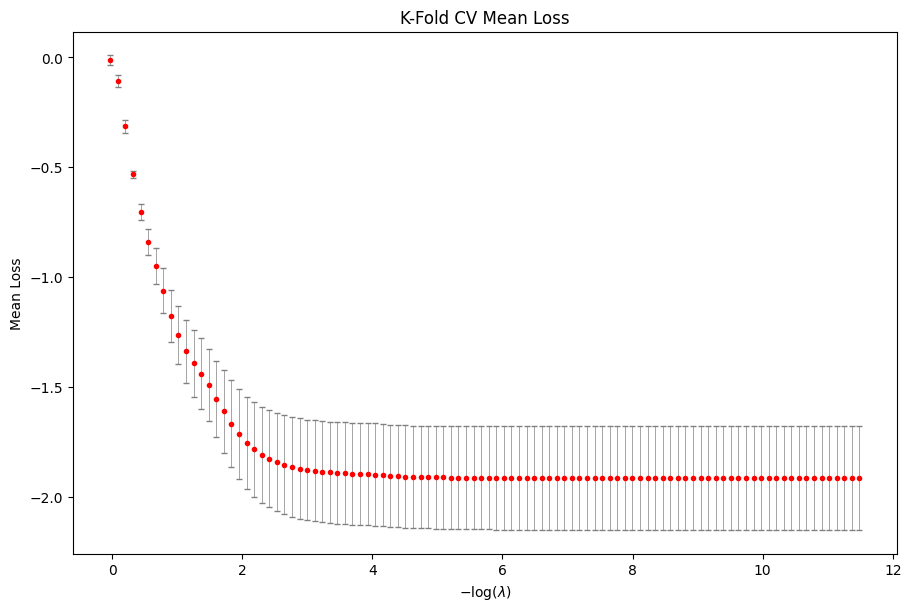

In [17]:
cv_fit.cv_plot()

## Features with zero variance will be removed automatically

If any column of our input data has zero variance, it will be removed by default.

In [22]:
X, y = simulate_binomial_data(n=1000, p=10)

# Make the first column zero variance
X[:, 0] = 1
zero_var_fit = fit_unilasso(X,
                            y,
                            family = 'binomial',
                            lmdas = [0.01, 0.02, 0.1, 0.2], 
                            verbose = True
                            )

100%|          | 0/4 [00:00:00<?, ?it/s]██████████| 4/4 [00:00:00<00:00:00, 5681.14it/s] [dev:19.2%]██████████| 4/4 [00:00:00<00:00:00, 1092.41it/s] [dev:19.2%]


Number of Selected Features: [5 4 1 0]
Regularization path (rounded to 3 decimal places): [0.01 0.02 0.1  0.2 ]


Note that the corresponding coefficient for the first column is 0 across regularization parameters.

In [23]:
print(zero_var_fit.coef[:, 0])

[0. 0. 0. 0.]
